# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
from collections.abc import Iterable
from IPython.display import display, Markdown

Let's generate our dataset and take a look on it.

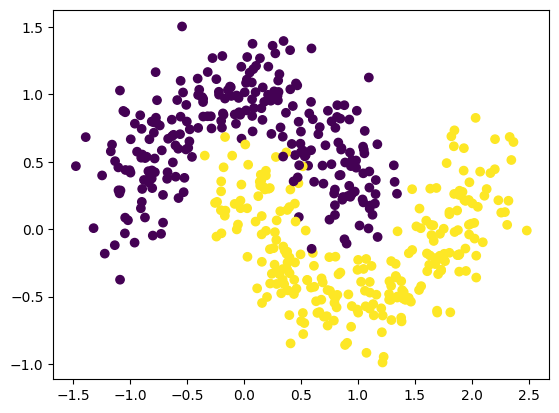

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.3, random_state=0xDEAD)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(solver="saga", C=3, max_iter=500) # add some params
svm = SVC(kernel='linear', C=6) # here too

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=6, kernel='linear')

In [5]:
def plot_decisions(X, y, clf, title):
    plt.figure(figsize=(15,10))
    sns.set()
    plot_decision_regions(X, y, clf, legend=2)
    plt.title(title, fontsize=24)
    plt.show()

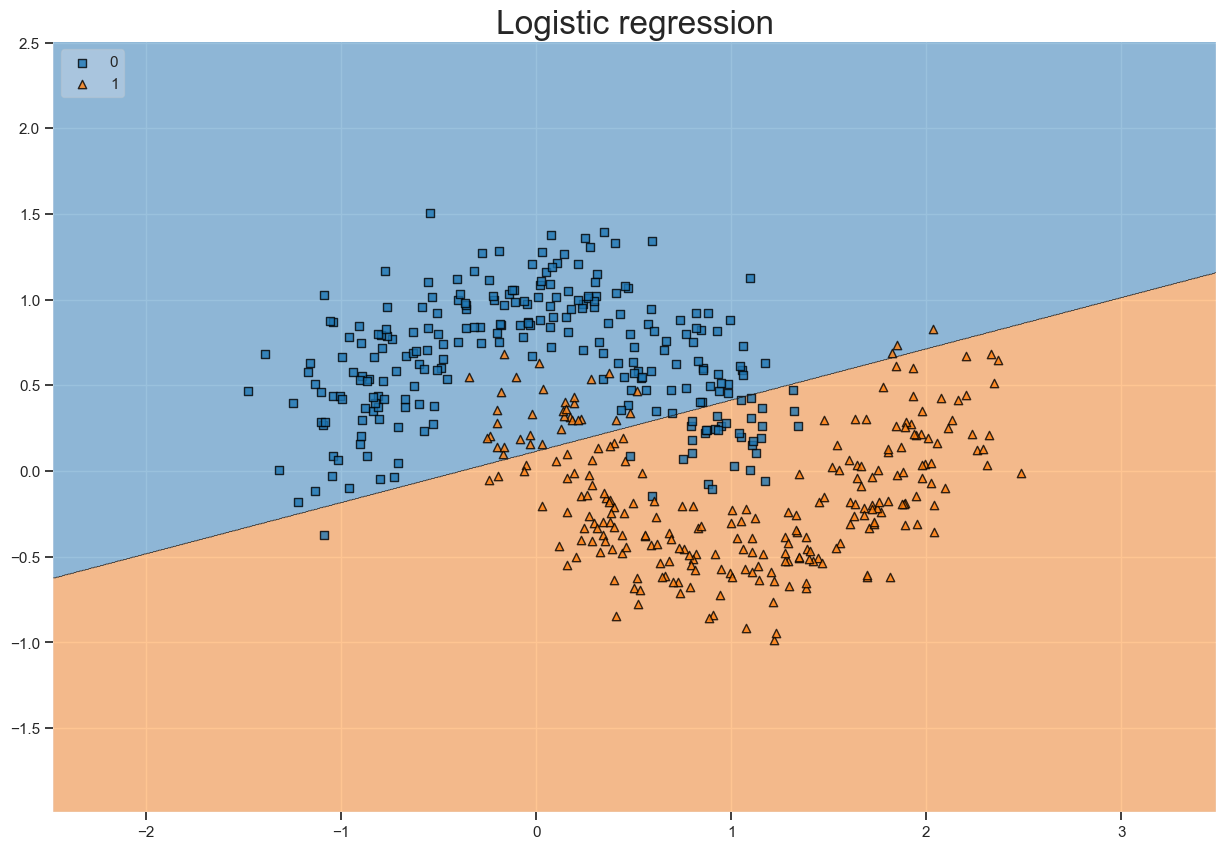

In [6]:
plot_decisions(moons_points, moons_labels, lr, "Logistic regression")

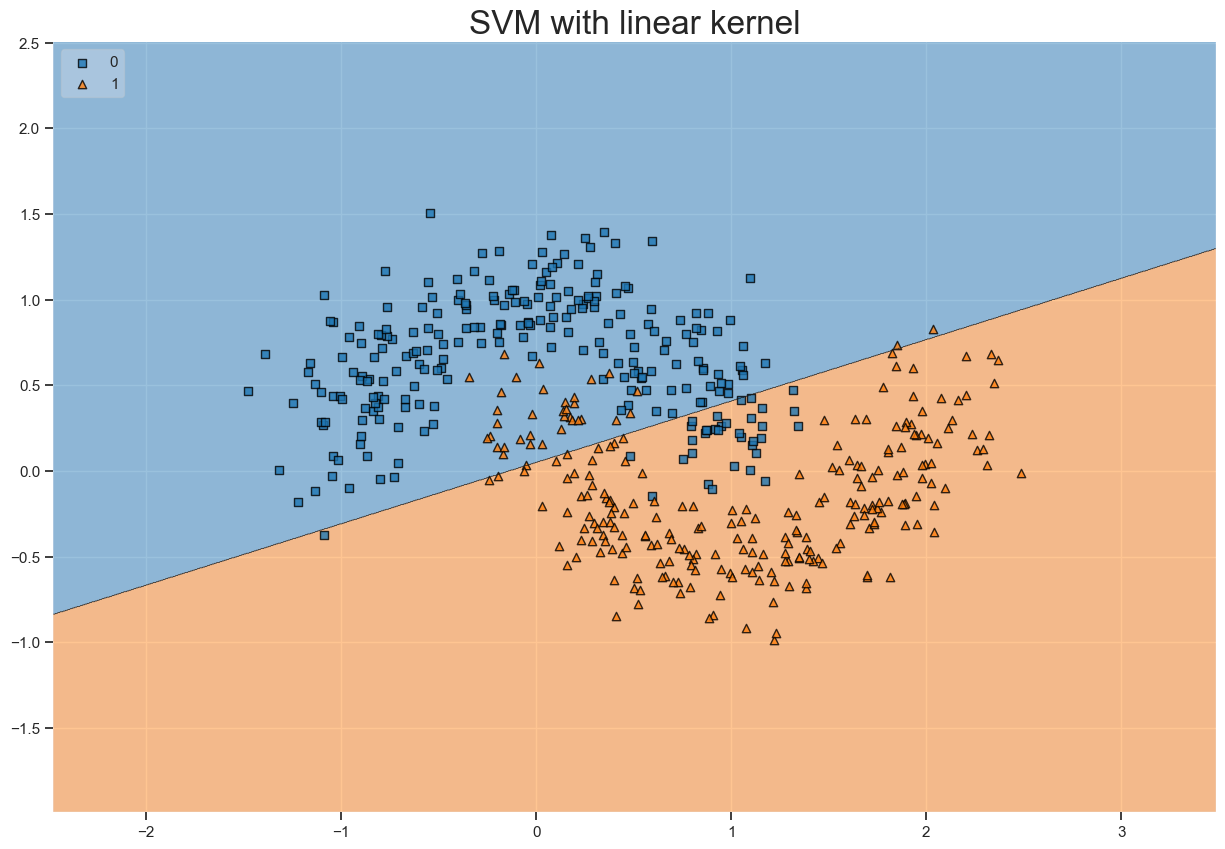

In [7]:
plot_decisions(moons_points, moons_labels, svm, "SVM with linear kernel")

In [8]:
def get_metrics(clf, X_test, y_test):
    preds = clf.predict(X_test)
    return accuracy_score(y_test, preds)

In [9]:
print(f"Accuracy score for logistic regression: {get_metrics(lr, X_test, y_test)}")
print(f"Accuracy score for SVM with the linear kernel: {get_metrics(svm, X_test, y_test)}")

Accuracy score for logistic regression: 0.8933333333333333
Accuracy score for SVM with the linear kernel: 0.8933333333333333


Linear separated classes show us the similar results of ``SVM`` and ``Logistic regression methods``

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [8]:
def plot_results_svc(kernel: str, X_train: Iterable,
                     y_train: Iterable,
                     X_test: Iterable,
                     y_test: Iterable,
                     title: str, degree: int=0):
    pipe = make_pipeline(SVC(kernel=kernel, degree=degree))

    params_grid = {'svc__C': np.linspace(0.01, 25, 100)}

    grid = GridSearchCV(pipe, param_grid=params_grid)
    grid.fit(X_train, y_train)

    preds = grid.predict(X_test)
    print(f"Best hyperparameter: {grid.best_params_['svc__C']}")
    print("Accuracy score for {} kernel: {}".format(kernel, accuracy_score(y_test, preds)))
    sns.set()
    plot_decisions(moons_points, moons_labels, grid, title)

<h1>poly kernel</h1>

Best hyperparameter: 0.2624242424242424
Accuracy score for poly kernel: 0.8933333333333333


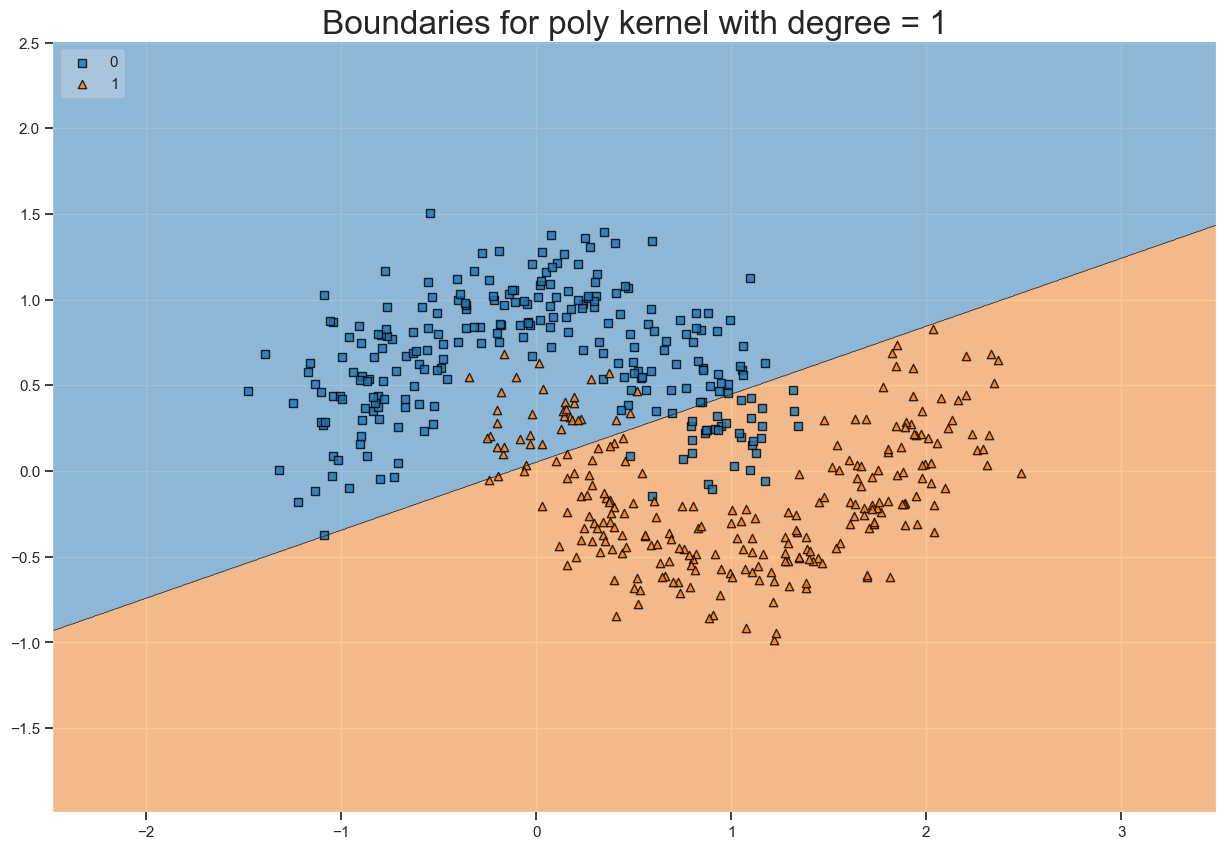

Best hyperparameter: 2.2818181818181813
Accuracy score for poly kernel: 0.74


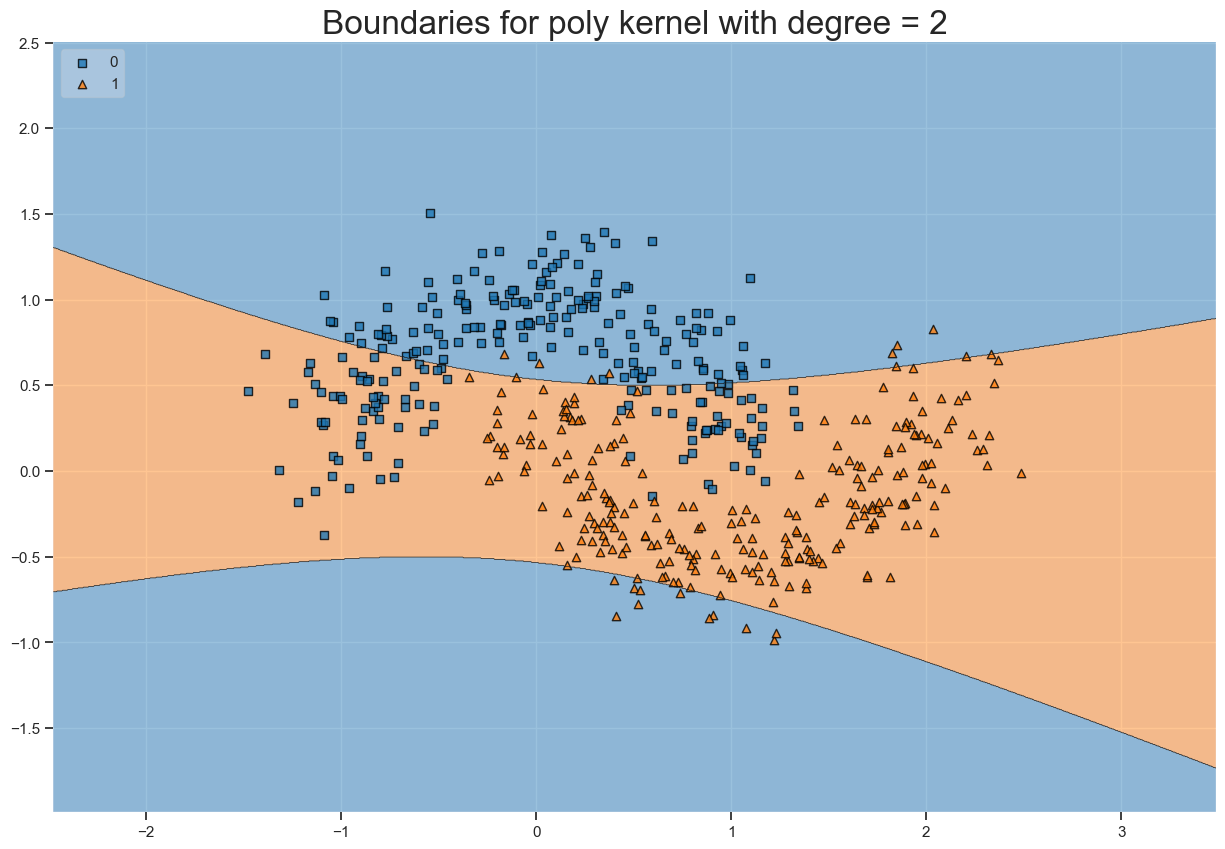

Best hyperparameter: 1.272121212121212
Accuracy score for poly kernel: 0.9133333333333333


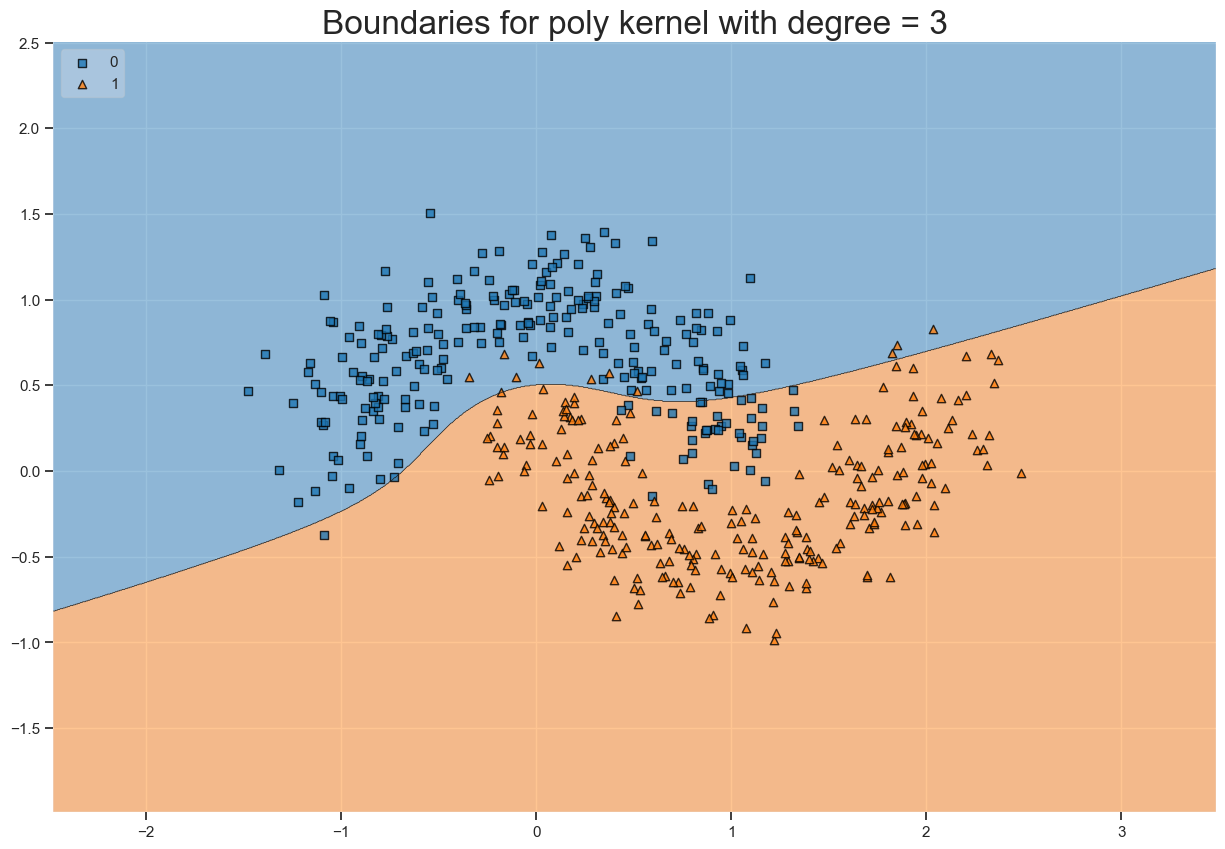

Best hyperparameter: 21.718484848484845
Accuracy score for poly kernel: 0.7133333333333334


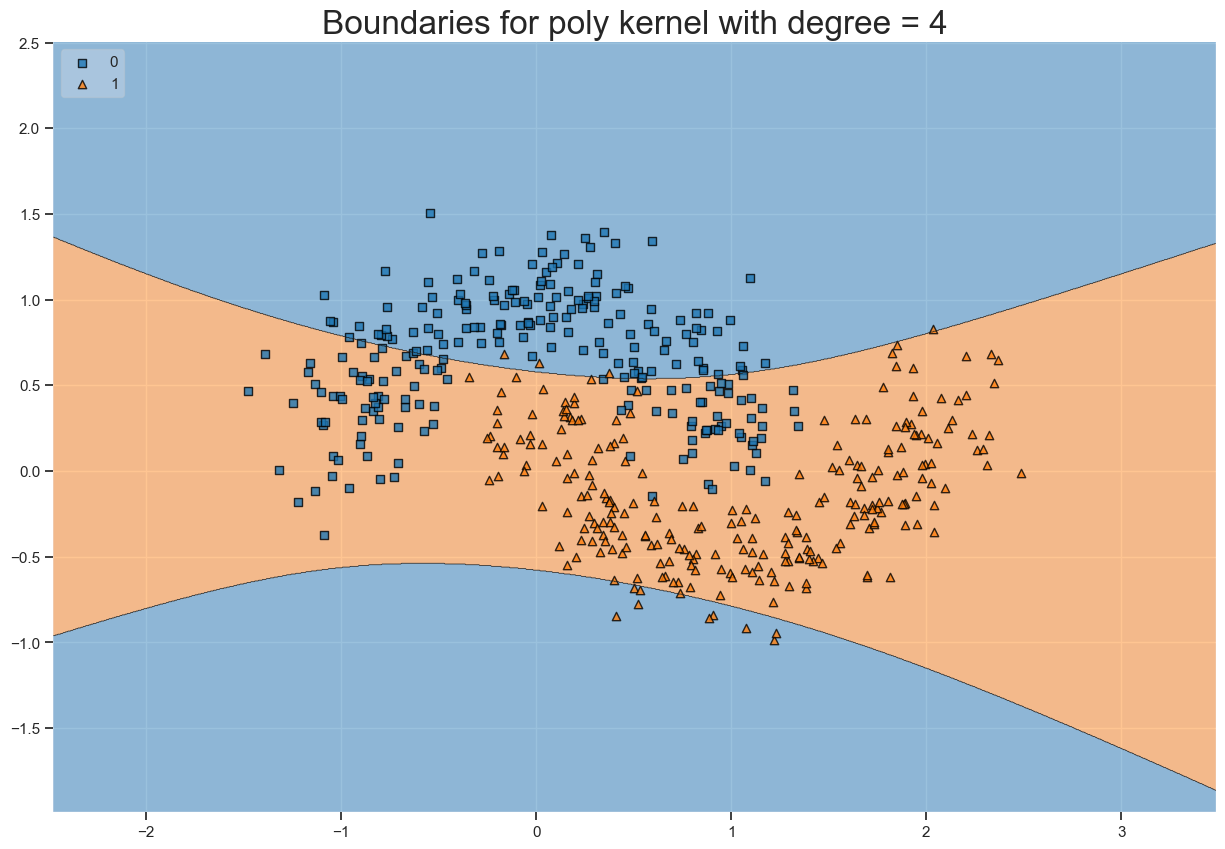

Best hyperparameter: 7.077878787878786
Accuracy score for poly kernel: 0.9


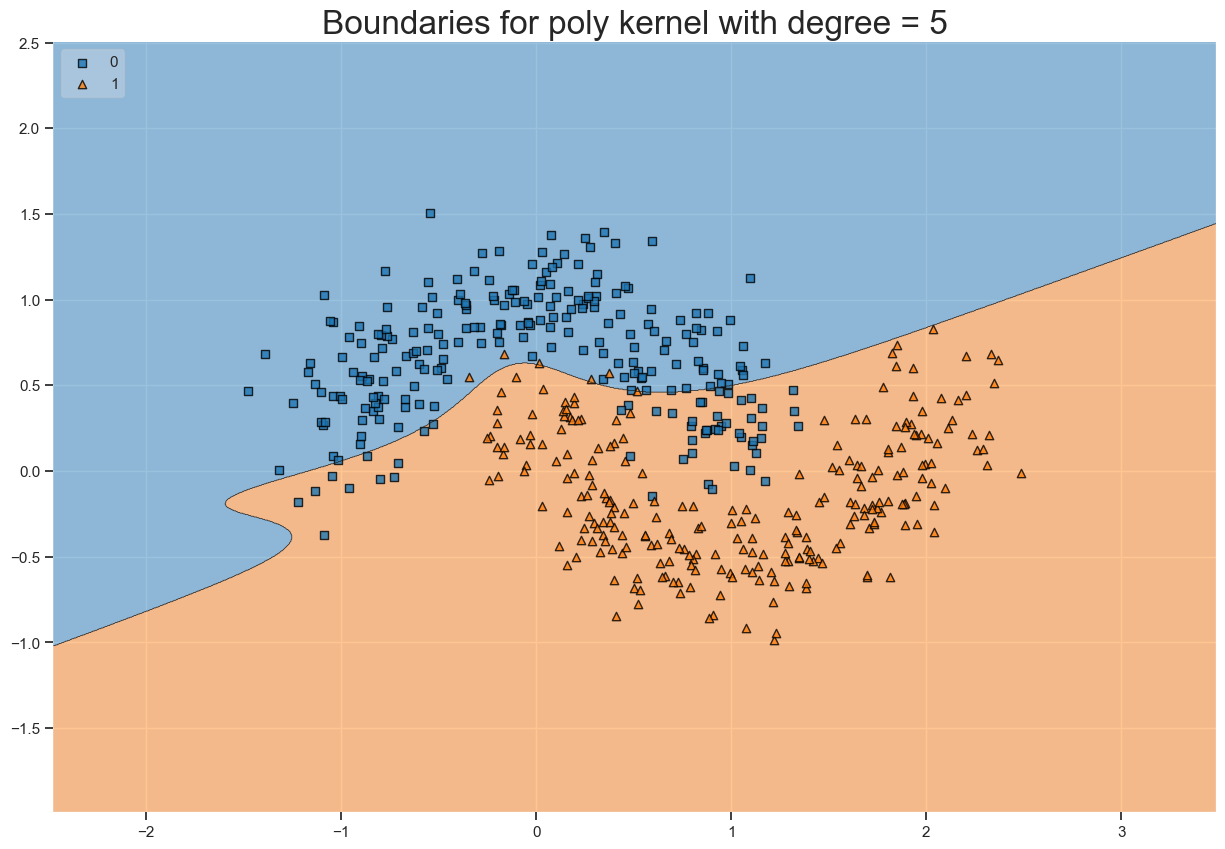

<h1>rbf kernel</h1>

Best hyperparameter: 10.359393939393938
Accuracy score for rbf kernel: 0.9866666666666667


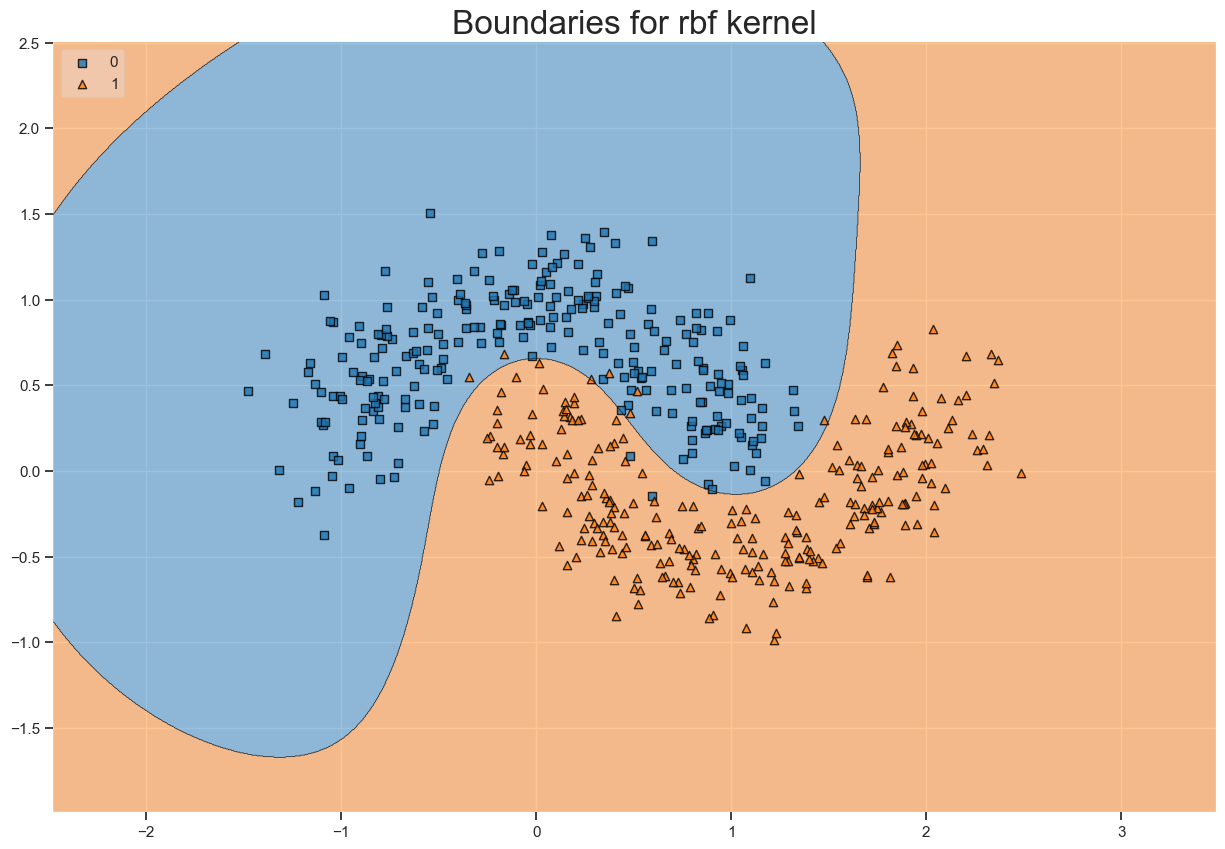

<h1>sigmoid kernel</h1>

Best hyperparameter: 0.01
Accuracy score for sigmoid kernel: 0.7866666666666666


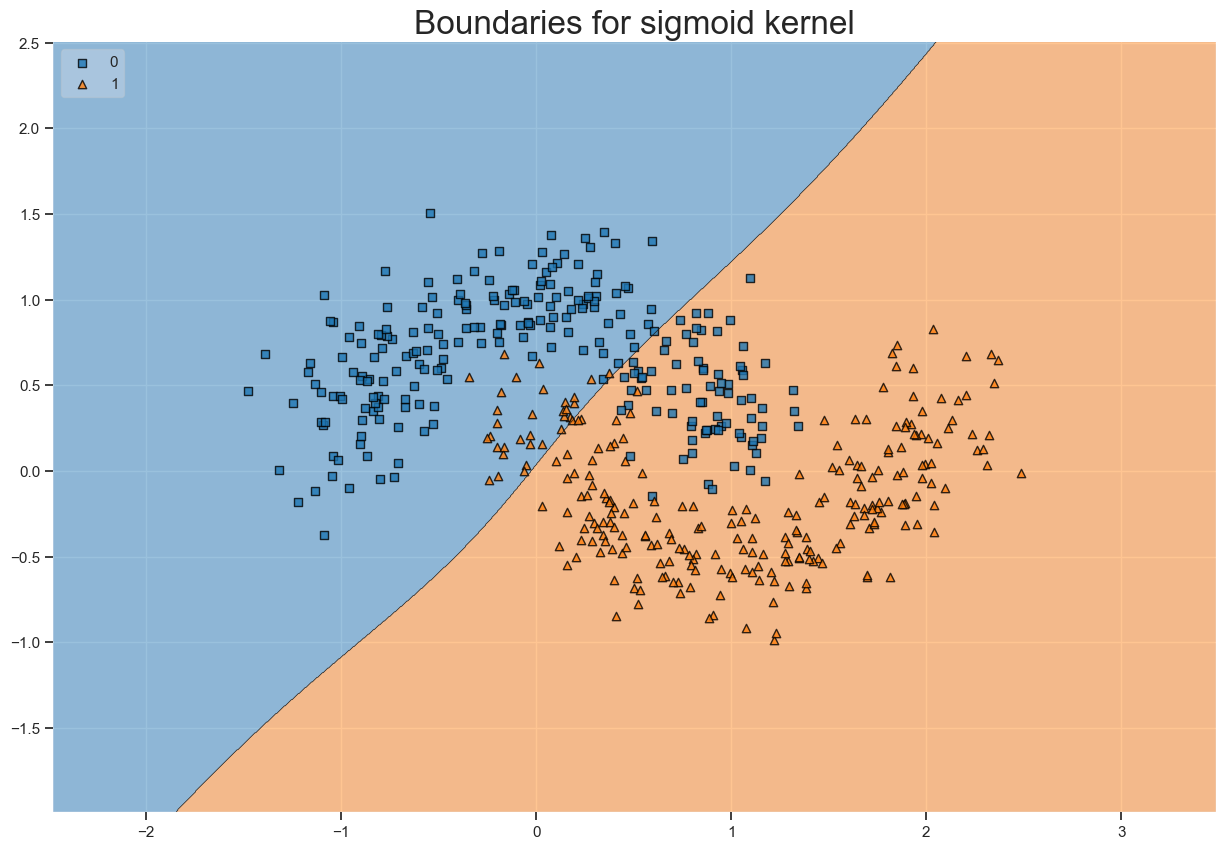

In [10]:
degrees = np.arange(1, 6)
kernels = ["poly", "rbf", "sigmoid"]
for kernel in kernels:
    display(Markdown(f'<h1>{kernel} kernel</h1>'))
    if kernel == "poly":
        for degree in degrees:
            plot_results_svc(kernel, X_train, y_train, X_test, y_test,
                    "Boundaries for {} kernel with degree = {}".format(kernel, degree),
                    degree)
    else:
        plot_results_svc(kernel, X_train, y_train, X_test, y_test,
                    "Boundaries for {} kernel".format(kernel))

Inferences: 
* Metric is higher on poly kernel with degree 3 and on rbf kernel;
* Mapping data into new space (high dimensional) makes non-separable separable one and changes the decision boundaries;
* The polynomial kernel with degree equal to 3 shows the best results due to the class layout.

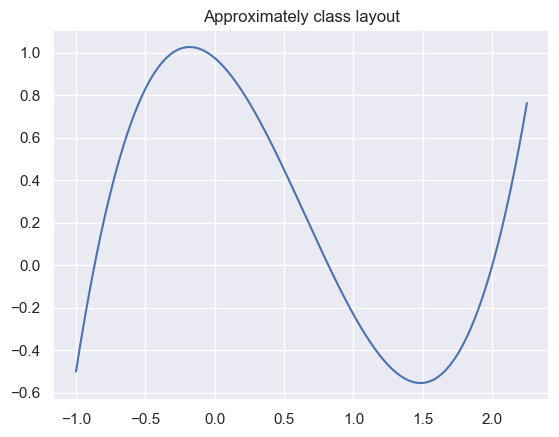

In [11]:
xs = np.linspace(-1, 2.25, 1000)
y = lambda x: x**3 * 0.686 - 1.34 * x**2 - 0.552 * x + 0.974
ys = y(xs)
plt.title("Approximately class layout")
plt.plot(xs, ys)

Coefficients have been obtained by Lagrange interpolation.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

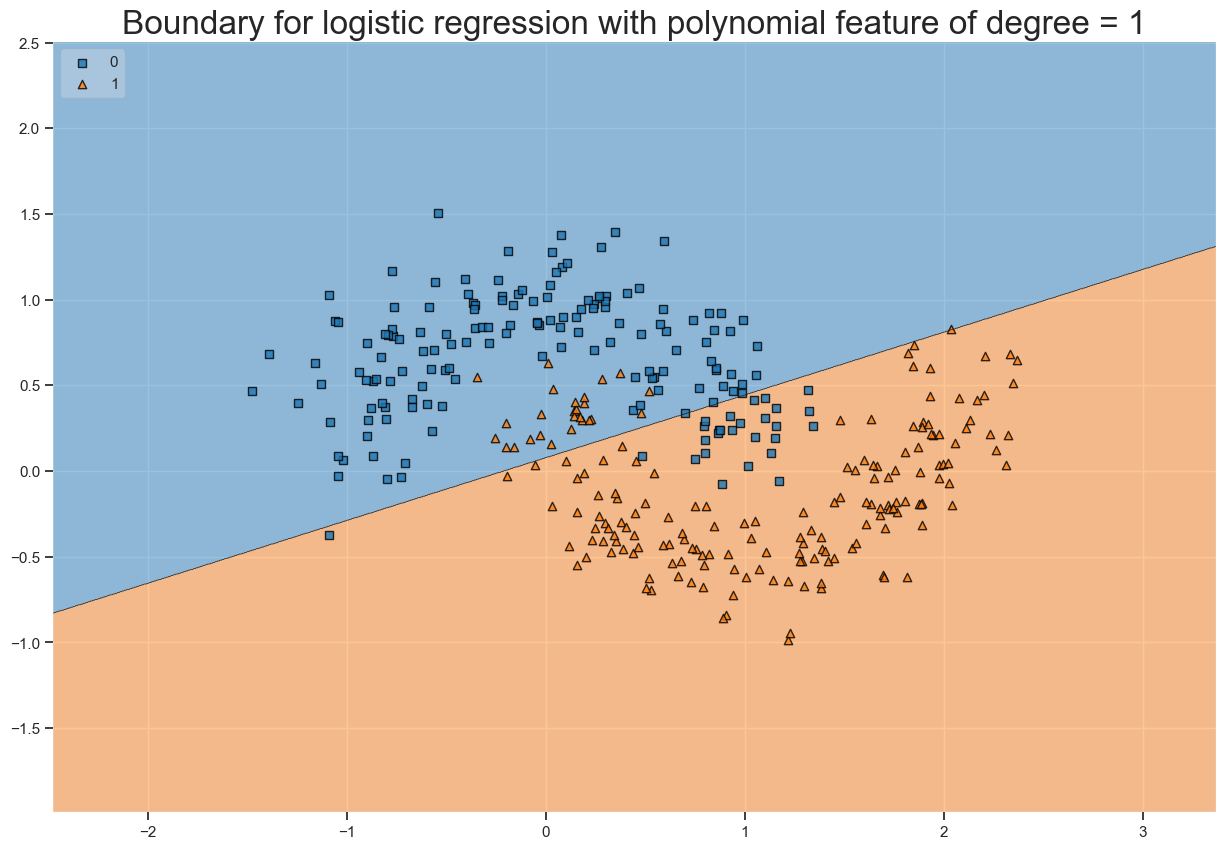

Best hyperparameter: 0.5148484848484848
Accuracy score for logistic regression with poly features: 0.8933333333333333


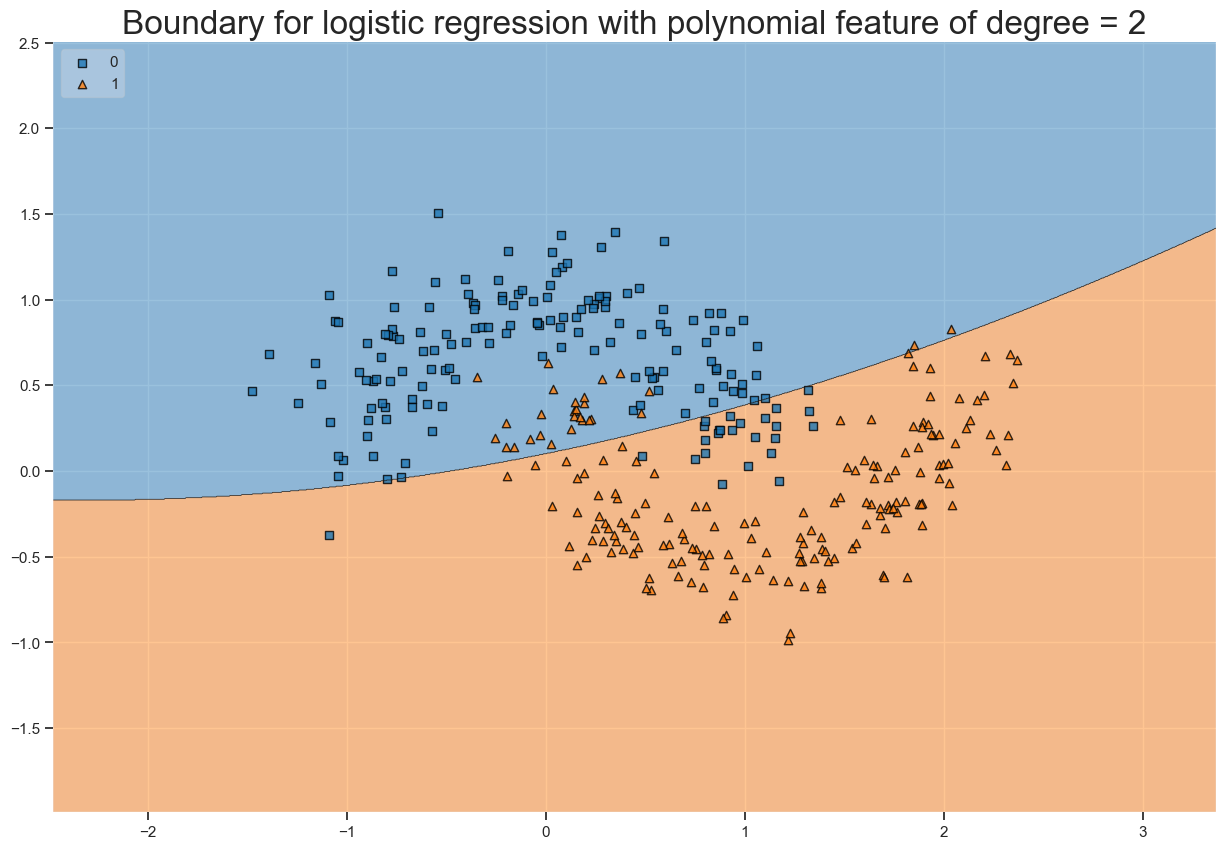

Best hyperparameter: 3.543939393939393
Accuracy score for logistic regression with poly features: 0.8733333333333333


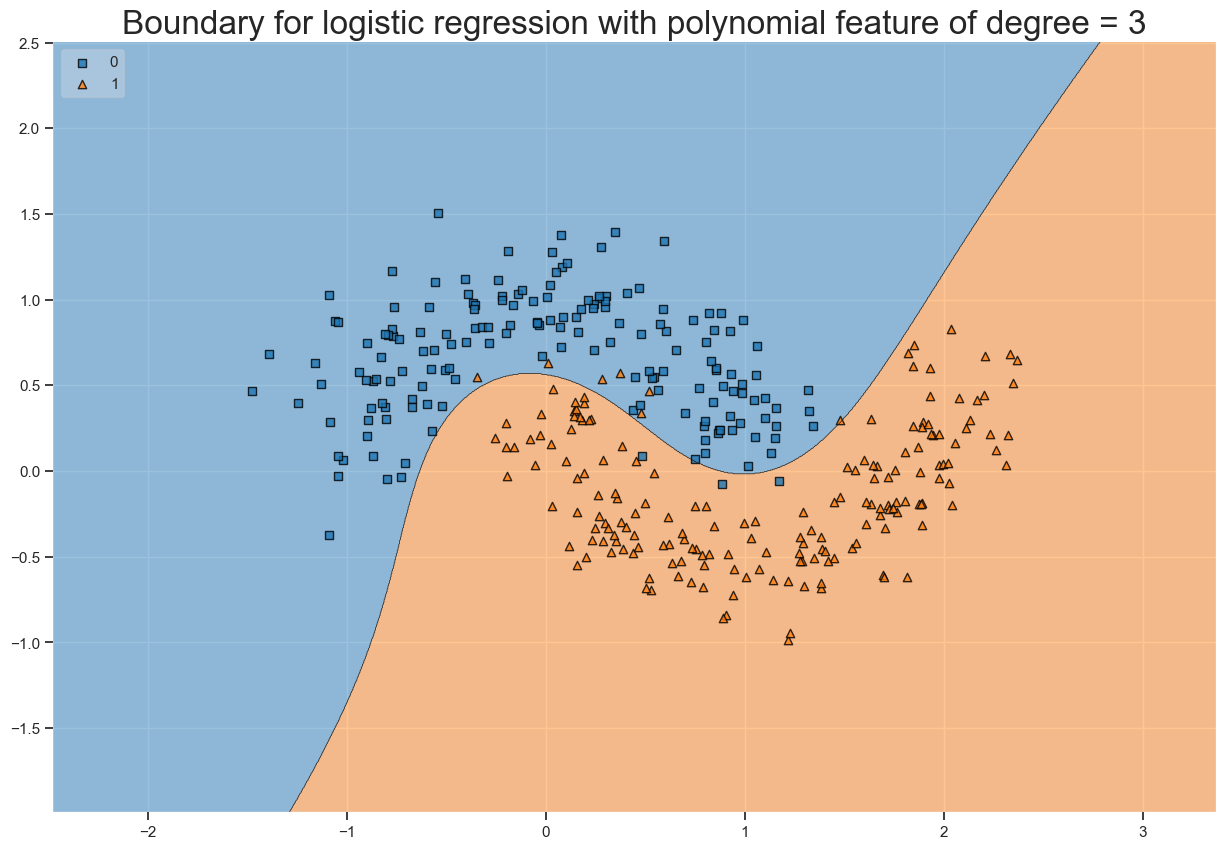

Best hyperparameter: 3.039090909090908
Accuracy score for logistic regression with poly features: 0.98


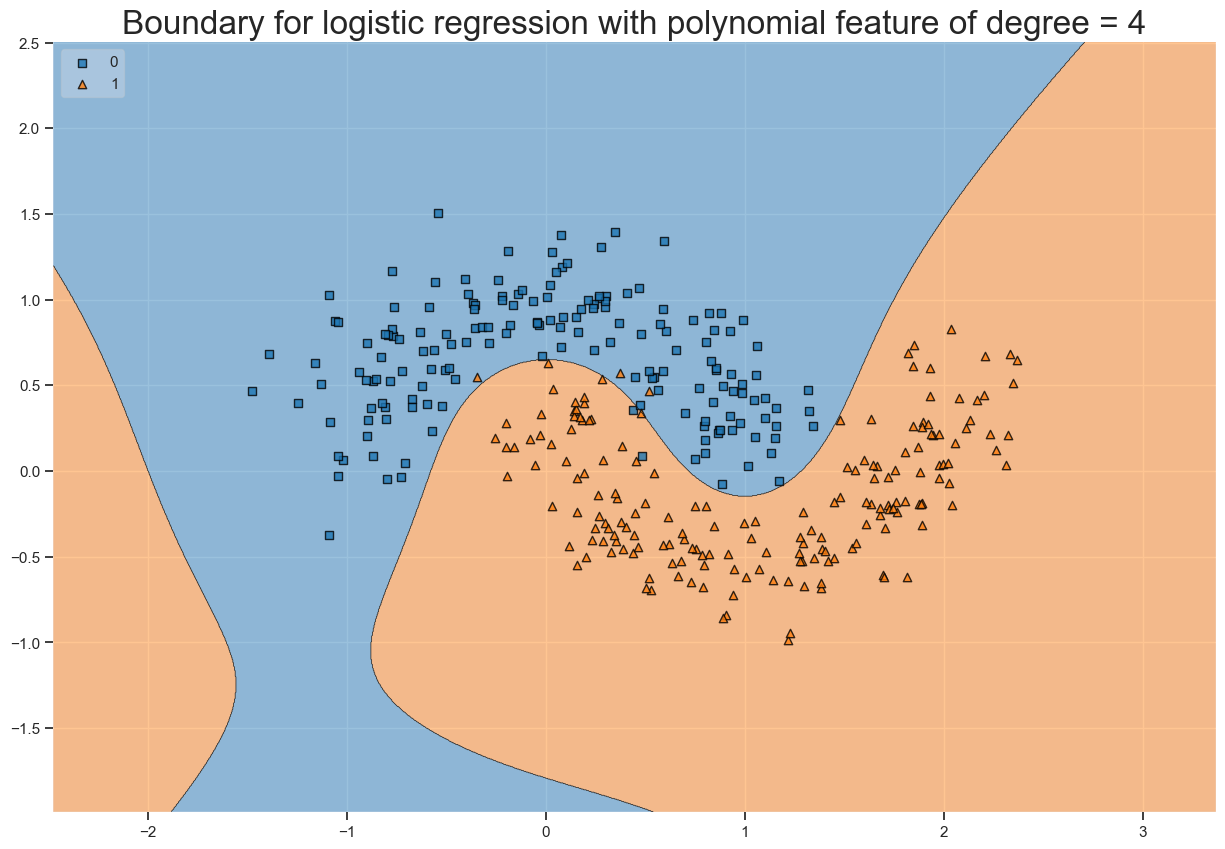

Best hyperparameter: 17.174848484848482
Accuracy score for logistic regression with poly features: 0.9866666666666667


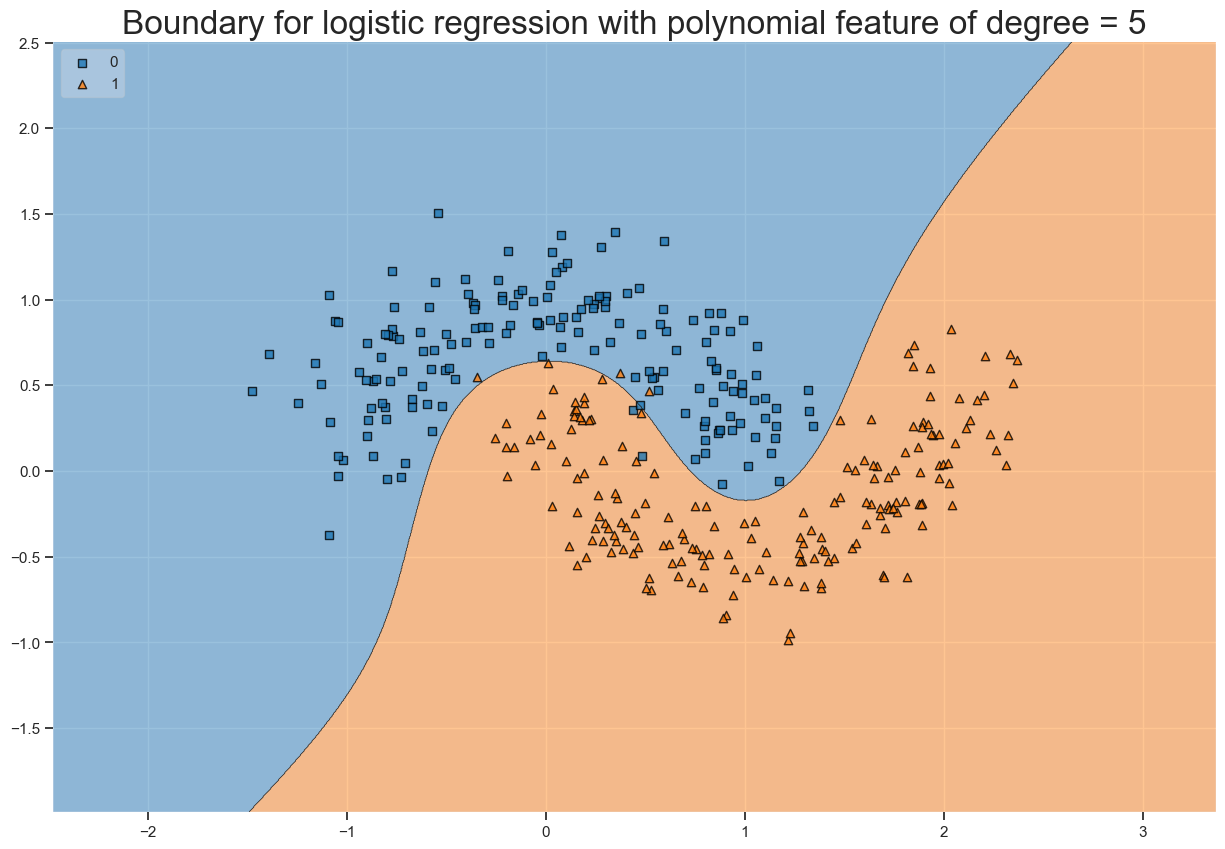

Best hyperparameter: 12.63121212121212
Accuracy score for logistic regression with poly features: 0.9866666666666667


In [12]:
from sklearn.preprocessing import PolynomialFeatures

param_grid = {'logisticregression__C': np.linspace(0.01, 25, 100)}

for degree in degrees:

    pipe = make_pipeline(
        PolynomialFeatures(degree=degree),
        LogisticRegression()
    )
    grid = GridSearchCV(pipe, param_grid=param_grid)
    grid.fit(X_train, y_train)

    plot_decisions(X_train, y_train, grid,
                   f"Boundary for logistic regression with polynomial feature of degree = {degree}")
    
    preds = grid.predict(X_test)
    
    print(f"Best hyperparameter: {grid.best_params_['logisticregression__C']}")
    print(f"Accuracy score for logistic regression with poly features: {accuracy_score(y_test, preds)}")

Inference:

* The most optimal degree of polynomial features is equal to 3. It is the same as for polynomial kernel for SVM. 
* But the obtained border for logistic regression is more exact than for SVM ones. 

In [13]:
import matplotlib
matplotlib.rc_file_defaults()

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

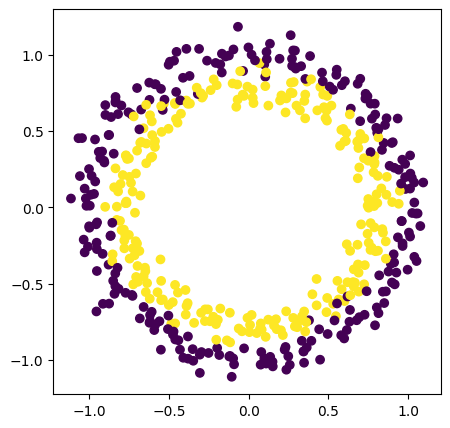

In [14]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

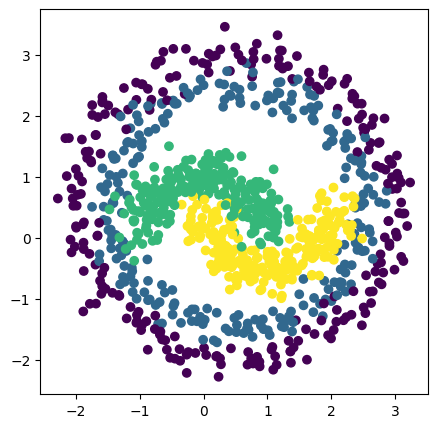

In [15]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [16]:
def plot_results(pipe, params_grid, 
                X_train: Iterable,
                y_train: Iterable,
                X_test: Iterable,
                y_test: Iterable,
                points: Iterable,
                labels: Iterable):

    grid = GridSearchCV(pipe, param_grid=params_grid)
    grid.fit(X_train, y_train)

    preds = grid.predict(X_test)
    print(f"Best hyperparameter: {grid.best_params_}")
    print("Accuracy score for {}: {}".format(name_clf, accuracy_score(y_test, preds)))
    print()
    plot_decision_regions(points, labels, grid, legend=2)

In [46]:
x_min

-1.214308112641255

Best hyperparameter: {'logisticregression__C': 6.3206060606060595}
Accuracy score for LogisticRegression with polynomial features: 0.94

Best hyperparameter: {'svc__C': 0.7672727272727271}
Accuracy score for SVC with rbf kernel: 0.9466666666666667

Best hyperparameter: {'svc__C': 4.048787878787878}
Accuracy score for SVC with polynomial kernel of degree 2: 0.9533333333333334

Best hyperparameter: {'kneighborsclassifier__n_neighbors': 7}
Accuracy score for KNeighborsClassifier: 0.92

Best hyperparameter: {'decisiontreeclassifier__max_depth': 16}
Accuracy score for DecisionTreeClassifier: 0.88

Best hyperparameter: {'randomforestclassifier__max_depth': 12}
Accuracy score for RandomForestClassifier: 0.9133333333333333

Best hyperparameter: {'adaboostclassifier__n_estimators': 45}
Accuracy score for AdaBoostClassifier: 0.9066666666666666

Best hyperparameter: {'gaussiannb__var_smoothing': 1e-09}
Accuracy score for Naive Bayes: 0.88

Best hyperparameter: {'quadraticdiscriminantanalysis__tol

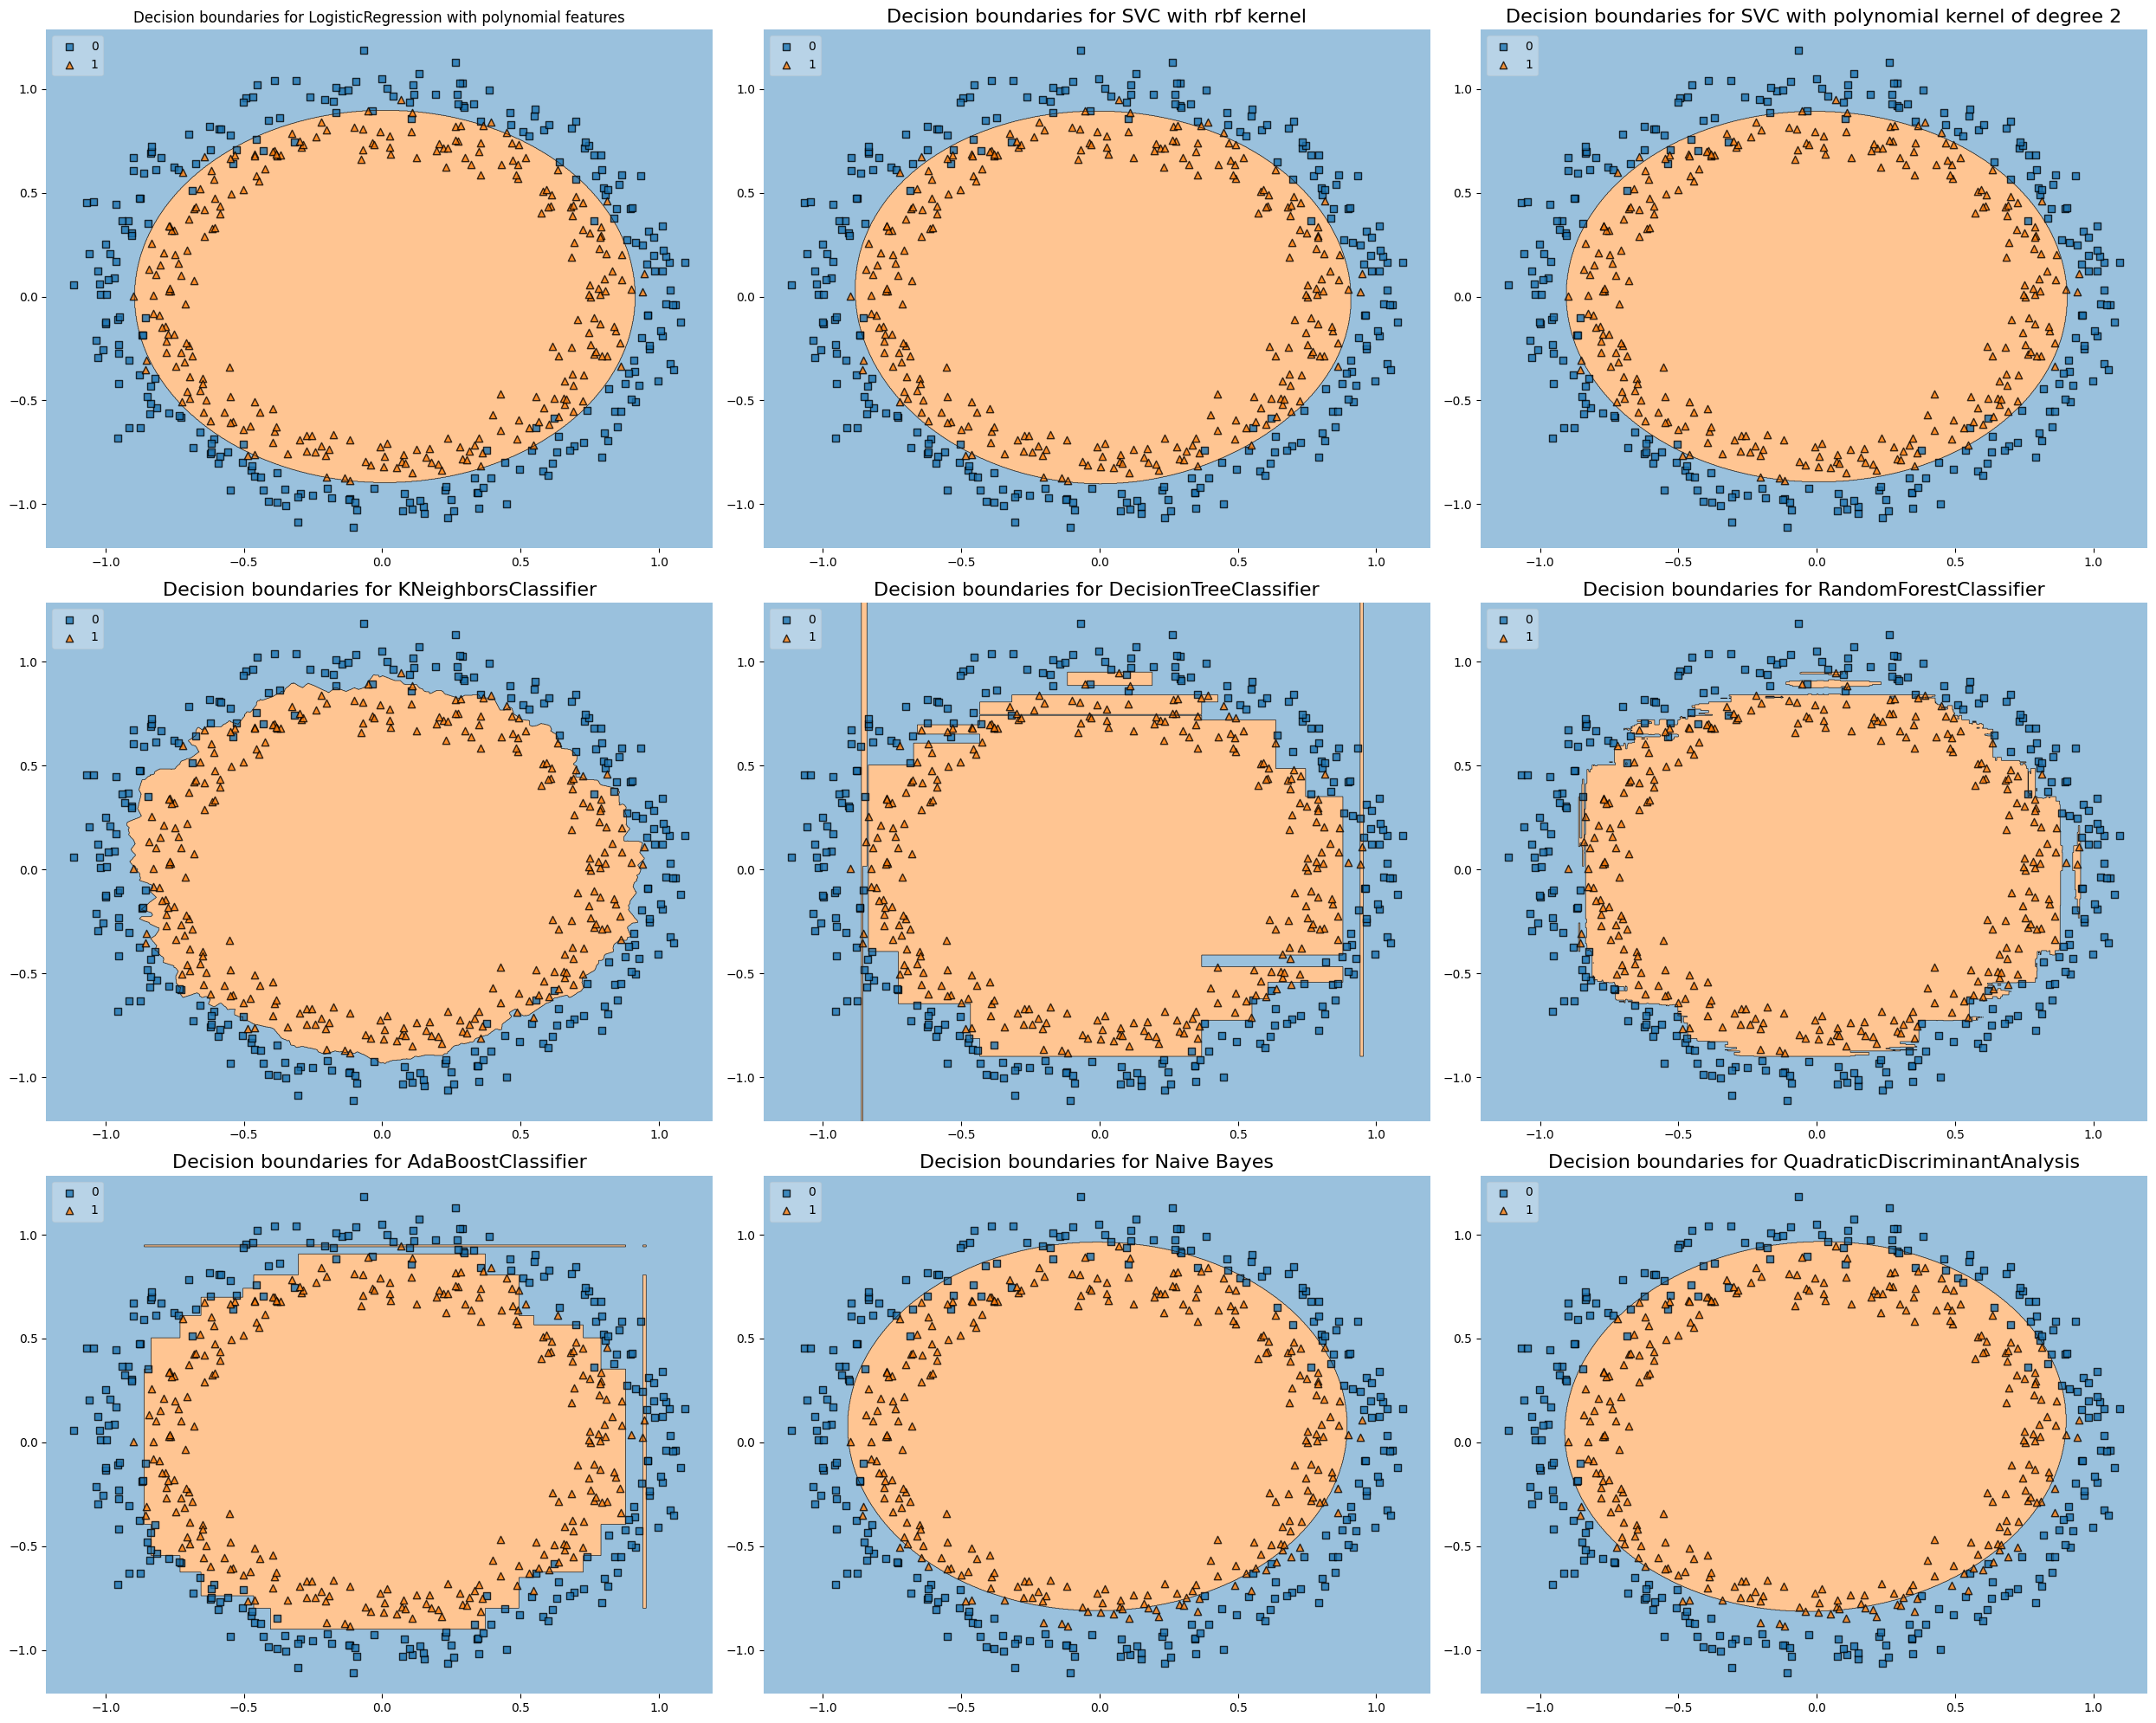

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

X_train, X_test, y_train, y_test = train_test_split(circles_points, circles_labels, test_size=0.3, random_state=42)

x_min, x_max = circles_points[:, 0].min() - 0.1, circles_points[:, 0].max() + 0.1
y_min, y_max = circles_points[:, 1].min() - 0.1, circles_points[:, 1].max() + 0.1


name_clfs = [
        "LogisticRegression with polynomial features",
        "SVC with rbf kernel",
        "SVC with polynomial kernel of degree 2",
        "KNeighborsClassifier",
        "DecisionTreeClassifier",
        "RandomForestClassifier",
        "AdaBoostClassifier",
        "Naive Bayes",
        "QuadraticDiscriminantAnalysis"
]

clfs = [LogisticRegression(), 
        SVC(kernel="rbf"), 
        SVC(kernel="poly", degree=2), 
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()
]
grids_params = [
        {'logisticregression__C': np.linspace(0.01, 25, 100)},
        {'svc__C': np.linspace(0.01, 25, 100)},
        {'svc__C': np.linspace(0.01, 25, 100)},
        {'kneighborsclassifier__n_neighbors': np.arange(1, 22, 3)},
        {'decisiontreeclassifier__max_depth': np.arange(2, 25)},
        {'randomforestclassifier__max_depth': np.arange(2, 30, 2)},
        {'adaboostclassifier__n_estimators': np.arange(20, 50, 5)},
        {'gaussiannb__var_smoothing': [1e-9]},
        {"quadraticdiscriminantanalysis__tol": [1e-4]}
]

assert len(clfs) == len(grids_params)
i = 1
pipe = make_pipeline(PolynomialFeatures(degree=2),
                clfs[0])
fig = plt.figure(figsize=(25,20))
ax = plt.subplot(3, 3, i)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
name_clf = name_clfs[0]
title = f"Decision boundaries for {name_clf}"
ax.set_title(title)

# ax.set_xticks(())
# ax.set_yticks(())
plot_results(
        pipe=pipe, params_grid=grids_params[0], 
        X_train=X_train, y_train=y_train,
        X_test=X_test, y_test=y_test,
        points=circles_points, labels=circles_labels
        )
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
for clf, param_grid in zip(clfs[1:], grids_params[1:]):
        ax = plt.subplot(3, 3, i+1)
        pipe = make_pipeline(
                clfs[i]
        )
        # ax.margins(0)
        name_clf = name_clfs[i]
        title = f"Decision boundaries for {name_clf}"
        ax.set_title(title)
        ax.title.set_fontsize(16)
        plot_results(
                pipe=pipe, params_grid=grids_params[i], 
                X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                points=circles_points, labels=circles_labels
        )
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        i += 1
plt.tight_layout()

Best hyperparameter: {'logisticregression__C': 19.446666666666665}
Accuracy score for LogisticRegression with polynomial features: 0.9466666666666667

Best hyperparameter: {'svc__C': 14.145757575757573}
Accuracy score for SVC with rbf kernel: 0.95

Best hyperparameter: {'svc__C': 32.734545454545454}
Accuracy score for SVC with polynomial kernel of degree 3: 0.9466666666666667

Best hyperparameter: {'kneighborsclassifier__n_neighbors': 7}
Accuracy score for KNeighborsClassifier: 0.92

Best hyperparameter: {'decisiontreeclassifier__max_depth': 24}
Accuracy score for DecisionTreeClassifier: 0.8833333333333333

Best hyperparameter: {'randomforestclassifier__max_depth': 16}
Accuracy score for RandomForestClassifier: 0.8966666666666666

Best hyperparameter: {'adaboostclassifier__n_estimators': 48}
Accuracy score for AdaBoostClassifier: 0.5866666666666667

Best hyperparameter: {'gaussiannb__var_smoothing': 1e-09}
Accuracy score for Naive Bayes: 0.71

Best hyperparameter: {'quadraticdiscrimina

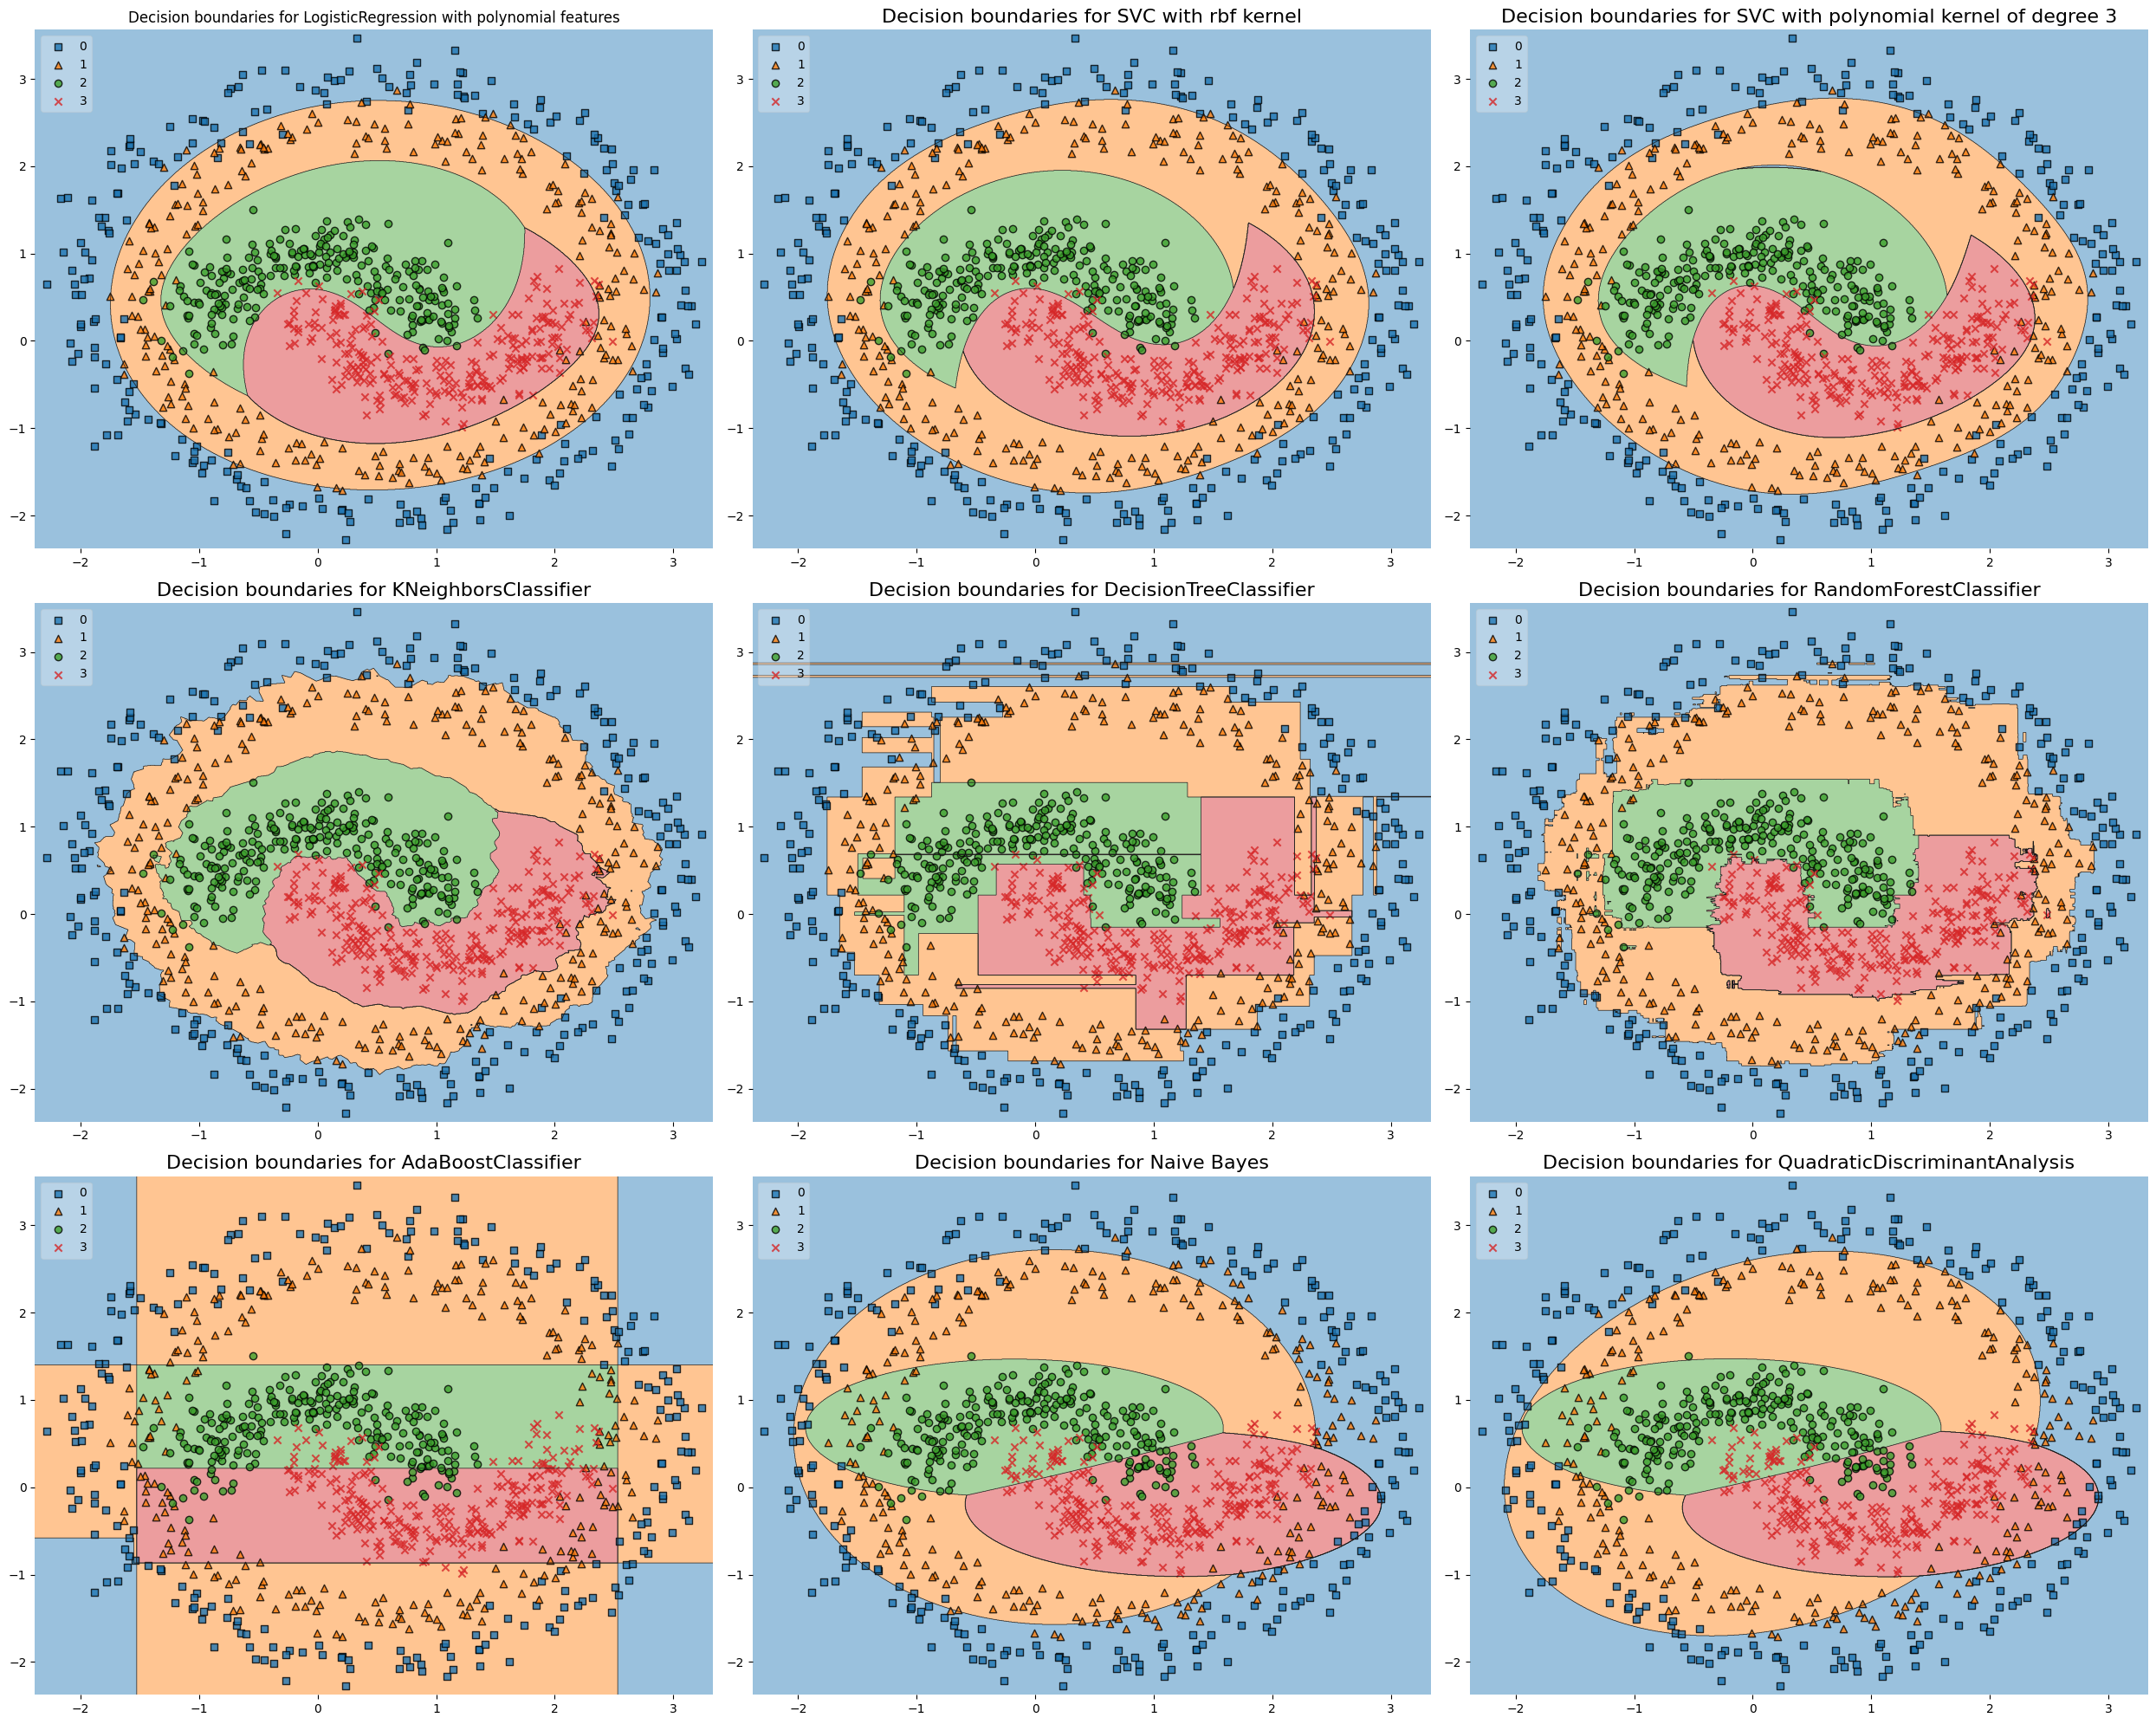

In [21]:
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.3, random_state=42)

x_min, x_max = points[:, 0].min() - 0.1, points[:, 0].max() + 0.1
y_min, y_max = points[:, 1].min() - 0.1, points[:, 1].max() + 0.1

name_clfs = [
        "LogisticRegression with polynomial features",
        "SVC with rbf kernel",
        "SVC with polynomial kernel of degree 3",
        "KNeighborsClassifier",
        "DecisionTreeClassifier",
        "RandomForestClassifier",
        "AdaBoostClassifier",
        "Naive Bayes",
        "QuadraticDiscriminantAnalysis"
]

grids_params = [
        {'logisticregression__C': np.linspace(0.01, 25, 100)},
        {'svc__C': np.linspace(0.01, 25, 100)},
        {'svc__C': np.linspace(0.01, 120, 100)},
        {'kneighborsclassifier__n_neighbors': np.arange(1, 22, 3)},
        {'decisiontreeclassifier__max_depth': np.arange(2, 25)},
        {'randomforestclassifier__max_depth': np.arange(2, 30, 2)},
        {'adaboostclassifier__n_estimators': np.arange(20, 70, 2)},
        {'gaussiannb__var_smoothing': [1e-9]},
        {"quadraticdiscriminantanalysis__tol": [1e-4]}
]


clfs = [LogisticRegression(max_iter=1500, tol=1e-3), 
        SVC(kernel="rbf"), 
        SVC(kernel="rbf", degree=3), 
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()
]

i = 1
pipe = make_pipeline(PolynomialFeatures(degree=3),
                clfs[0])
fig = plt.figure(figsize=(25,20))
ax = plt.subplot(3, 3, i)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
name_clf = name_clfs[0]
title = f"Decision boundaries for {name_clf}"
ax.set_title(title)

# ax.set_xticks(())
# ax.set_yticks(())
plot_results(
        pipe=pipe, params_grid=grids_params[0], 
        X_train=X_train, y_train=y_train,
        X_test=X_test, y_test=y_test,
        points=points, labels=labels
        )
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
for clf, param_grid in zip(clfs[1:], grids_params[1:]):
        ax = plt.subplot(3, 3, i+1)
        pipe = make_pipeline(
                clfs[i]
        )
        # ax.margins(0)
        name_clf = name_clfs[i]
        title = f"Decision boundaries for {name_clf}"
        ax.set_title(title)
        ax.title.set_fontsize(16)
        plot_results(
                pipe=pipe, params_grid=grids_params[i], 
                X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                points=points, labels=labels
        )
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        i += 1
plt.tight_layout()

Inferences

* SVM and logistic regression have less variance than KNN, that is why decision boundaries looks more smoothly;

* SVM with polynomial kernel and log regression with polynomial features performed in the same way in a metric sense, but log regression is more effective by time due to the exponential dependence between features and degree;

* Decision boundary of a decision tree is determined by overlapping orthogonal half-planes (representing the result of each subsequent decision) and that is why it looks the way it did;

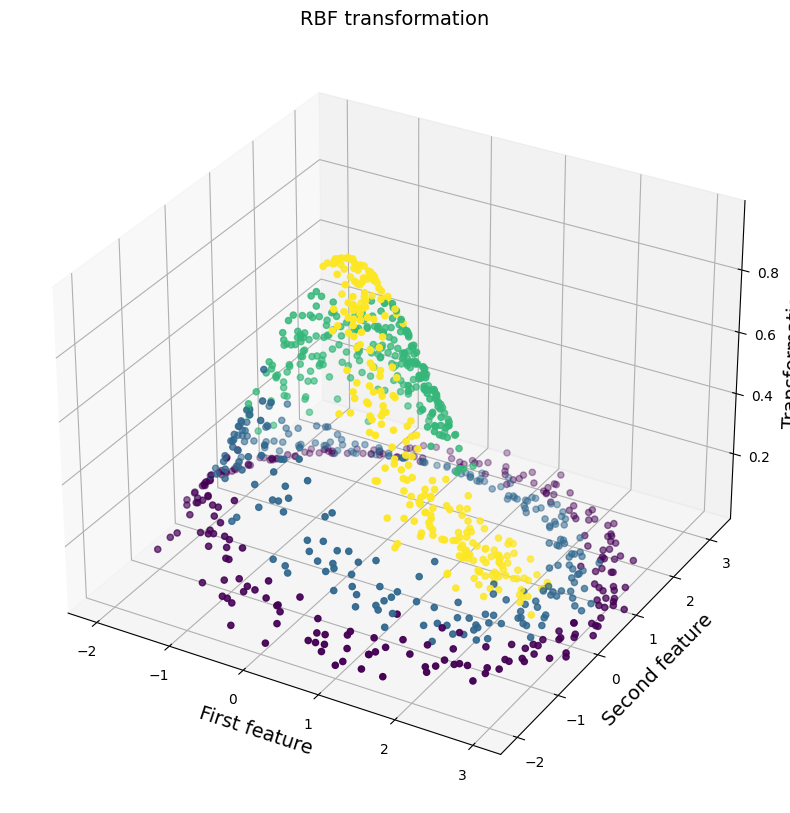

In [41]:
func = lambda x, y: np.exp(-(x ** 2 + y ** 2) / 2)

values = [func(point[0], point[1]) for point in points]
matplotlib.rc_file_defaults()
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(points[:, 0], points[:, 1], values, c=labels)

ax.set_title('RBF transformation', fontsize=14)
ax.set_xlabel('First feature', fontsize=14)
ax.set_ylabel('Second feature', fontsize=14)
ax.set_zlabel('Transformation', fontsize=14)
ax.margins(0)
plt.tight_layout()

RBF kernel can clarify the distinction between classes.